<img src='https://git.services.meeo.it/ltpy/climate/-/raw/main/SMA2024_CM_SAF/img/CM_SAF_banner.png' align='center' width='100%'>

# **SARAH - A Climate Data Record on Surface Solar Radiation**

## **_14 June 2023 - ONLINE Short Course_**

## <span style="color:blue">**Using the data - Jupyter Notebook** </span>.

<hr>

### **Introduction**

This notebook will introduce two products of <span style="color:red">**SARAH-3**</span>, the third release of the **SARAH** climate data record, showing how to download the data and how to extract and analyze the parameters contained in the products.

### **Products in use**

The following **SARAH-3** products will be used in this notebook:

| **Product Name**                               | Product Family | Area | Temp. Resolution | Spat. Resolution (degrees) | Stat. |
|--------------------------------------------| ----| ---  |:---: | :---: | --- |
| [<span style="color:red">**SDU - Sunshine Duration**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22194_22477&fid=36) | <span style="color:blue">**SARAH ed. 3.0**</span> | <span style="color:blue">**METEOSAT full disk**</span> | <span style="color:blue">**Monthly**</span> | <span style="color:blue">**0.05 x 0.05**</span> | <span style="color:blue">**Sum**</span> |
| [<span style="color:red">**SIS - Surface incoming shortwave radiation**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22200_22483&fid=36) | <span style="color:blue">**CLAAS ed. 3.0**</span> | <span style="color:blue">**METEOSAT full disk**</span> | <span style="color:blue">**Monthly**</span> | <span style="color:blue">**0.05 x 0.05**</span> | <span style="color:blue">**Mean**</span> |

### **Outline**

* [**1. Loading SARAH-3 Products**](#load)
* [**2. Reading SARAH-3 Products**](#read)
* [**3. Data Extraction and Analysis**](#analysis)

### **Importing required libraries**

In [1]:
import tarfile
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import cm as cm
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

<hr>

### <a id="load"></a>**1. Loading SARAH-3 products**

Depending on the data that are needed by the user, there are different ways to load SARAH-3 products:

<span style="color:blue">**Option 1** </span>: **_quick, small file size_**: load CLAAS-3 products using the corresponding **URL** (these are pre-modified files containing pre-specified region and one parameter per NetCDF file and they can accessed from a remote CM SAF server that permanently makes the data of the course available for the users)
The following example will load the daily Sunshine Duration (SDU) product for 1st May 2023, cut over Europe for the purpose of this short course.


In [39]:
monthly_SDU_cut = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/SARAH_SC/SDUms202305010000004UD10001I1UD.nc'+'#mode=bytes')

Now the product has been loaded into the variable named **daily_SDU** and it is possible to visualize its content just typing the name of the variable and running the cell:

In [40]:
monthly_SDU_cut

<xarray.Dataset>
Dimensions:         (time: 1, bnds: 2, lon: 840, lat: 600)
Coordinates:
  * time            (time) datetime64[ns] 2023-05-01
  * lon             (lon) float32 -11.98 -11.93 -11.88 ... 29.88 29.92 29.98
  * lat             (lat) float32 35.03 35.08 35.12 35.17 ... 64.88 64.93 64.97
Dimensions without coordinates: bnds
Data variables:
    time_bnds       (time, bnds) datetime64[ns] ...
    lon_bnds        (lon, bnds) float32 ...
    lat_bnds        (lat, bnds) float32 ...
    record_status   (time) int8 ...
    SDU             (time, lat, lon) float32 ...
    ndays_of_month  (time) float32 ...
    SDU_dss         (time, lat, lon) float32 ...
Attributes: (12/41)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                EUMETSAT/CMSAF
    Conventions:                CF-1.7,ACDD-1.3
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    ...                         ...
    instrument:                 SEVIRI > Spinning Enhanced Visible and Infrar...
    variable_id:                SDU
    license:                    The CM SAF data are owned by EUMETSAT and are...
    time_coverage_resolution:   P1M
    history:                    Mon Jun 05 10:26:03 2023: cdo -v -L -f nc4 -z...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

<span style="color:red">**Attention: the following example is valid only during the live short course**</span>

The same method is applied when the products have been already uploaded directly in the remote Jupyter environment. Infact in this case the user has just to replace the **URL** with the **path** to the directory where the file is stored. For example the SDU product just loaded from an external URL is also located at the following internal path: 

`./eodata/SARA3.0_WS/SDUms202305010000004UD10001I1UD.nc`

So, we can use the same instruction shown above, but using the file path; the output is the same:

In [8]:
monthly_SDU_cut = xr.open_dataset('./eodata/SARA3.0_WS/SDUms202305010000004UD10001I1UD.nc')
monthly_SDU_cut 

<xarray.Dataset>
Dimensions:         (time: 1, bnds: 2, lon: 840, lat: 600)
Coordinates:
  * time            (time) datetime64[ns] 2023-05-01
  * lon             (lon) float32 -11.98 -11.93 -11.88 ... 29.88 29.92 29.98
  * lat             (lat) float32 35.03 35.08 35.12 35.17 ... 64.88 64.93 64.97
Dimensions without coordinates: bnds
Data variables:
    time_bnds       (time, bnds) datetime64[ns] ...
    lon_bnds        (lon, bnds) float32 ...
    lat_bnds        (lat, bnds) float32 ...
    record_status   (time) int8 ...
    SDU             (time, lat, lon) float32 ...
    ndays_of_month  (time) float32 ...
    SDU_dss         (time, lat, lon) float32 ...
Attributes: (12/41)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                EUMETSAT/CMSAF
    Conventions:                CF-1.7,ACDD-1.3
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    ...                         ...
    instrument:                 SEVIRI > Spinning Enhanced Visible and Infrar...
    variable_id:                SDU
    license:                    The CM SAF data are owned by EUMETSAT and are...
    time_coverage_resolution:   P1M
    history:                    Mon Jun 05 10:26:03 2023: cdo -v -L -f nc4 -z...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

<span style="color:blue">**Option 2.** </span> _**working with original products**_: if the user needs to work directly with the original products, the process to download the products directly into the local or remote jupyter environment can be described in 3 steps:

- select a product, choose the related options from the [**Web User Interface**](https://wui.cmsaf.eu/safira/action/viewHome) and submit an order

- the email address associated to the CM SAF account will receive an email with the download options  for each submitted order; each email will contain a **wget** instruction that can be used to download the product as a **.tar** file. The user can get the product running the following Python line in a cell of code:

     `os.system('<wget instruction in the email>')`

     the **.tar** file will be downloaded directly in the directory where the notebook has been created.
     
- unpack the **.tar** file to open the original products. 

The following example will show the whole process to get an original product ready to be used in the jupyter environment.

#### <span style="color:orange">**Loading an original SARAH-3 product - example** </span>

After submitting an order to get the SDU daily product (whole disk) for 1st of May 2023, an email confirming the product availability will provide the **wget** instruction for download, which will be similar to the following, valid for the example:

`wget -r -np -nH --cut-dirs=1 --reject="index.html" --user=routcm --password=4gVdHUdpq8UhHcIJIP https://cmsaf.dwd.de/data/ORD50063/`

and the Python code will be:

In [11]:
os.system('wget -r -np -nH --cut-dirs=1 --reject="index.html" --user=routcm --password=4gVdHUdpq8UhHcIJIP https://cmsaf.dwd.de/data/ORD50063/')

--2023-06-13 17:34:59--  https://cmsaf.dwd.de/data/ORD50063/
Resolving cmsaf.dwd.de (cmsaf.dwd.de)... 141.38.2.29
Connecting to cmsaf.dwd.de (cmsaf.dwd.de)|141.38.2.29|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="restricted"
Reusing existing connection to cmsaf.dwd.de:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ORD50063/index.html.tmp’

     0K                                                        22.2M=0s

2023-06-13 17:34:59 (22.2 MB/s) - ‘ORD50063/index.html.tmp’ saved [280]

Loading robots.txt; please ignore errors.
--2023-06-13 17:34:59--  https://cmsaf.dwd.de/robots.txt
Reusing existing connection to cmsaf.dwd.de:443.
HTTP request sent, awaiting response... 404 Not Found
2023-06-13 17:34:59 ERROR 404: Not Found.

--2023-06-13 17:34:59--  https://cmsaf.dwd.de/data/ORD50063/ORD50063.tar
Reusing existing connection to cmsaf.dwd.de:443.
HTTP request sent, awaiting

0

In the example the user would find a subfolder named **ORD50063** in the same directory of the notebook. The subfolder would contain the TAR file that needs to be unpacked. 
The code to unpack a TAR file is always the same. The user should change the path of the original product and the destination path, when necessary. In this example:

In [15]:
my_tar = tarfile.open('ORD50063/ORD50063.tar')
my_tar.extractall() # a "work" directory is created for this product
my_tar.close()

Now the unpacked product `SDUds2023061100000042310001I1MA.nc` is in the same folder where the notebook is located, ready to be opened as it has been shown for the NetCDF file used in the **option 1** section.

<hr>

### <a id="read"></a>**2. Reading SARAH-3 products**

#### 2.1 'Single product' case

The previous section has described how to load and open a single SARAH-3 product that is contained in a NetCDF file. As already shown, in this case the file can be opened as follows:

In [15]:
daily_SDU = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/SARAH_SC/SDUms202305010000004UD10001I1UD.nc'+'#mode=bytes')
daily_SDU

<xarray.Dataset>
Dimensions:         (time: 1, bnds: 2, lon: 840, lat: 600)
Coordinates:
  * time            (time) datetime64[ns] 2023-05-01
  * lon             (lon) float32 -11.98 -11.93 -11.88 ... 29.88 29.92 29.98
  * lat             (lat) float32 35.03 35.08 35.12 35.17 ... 64.88 64.93 64.97
Dimensions without coordinates: bnds
Data variables:
    time_bnds       (time, bnds) datetime64[ns] ...
    lon_bnds        (lon, bnds) float32 ...
    lat_bnds        (lat, bnds) float32 ...
    record_status   (time) int8 ...
    SDU             (time, lat, lon) float32 ...
    ndays_of_month  (time) float32 ...
    SDU_dss         (time, lat, lon) float32 ...
Attributes: (12/41)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                EUMETSAT/CMSAF
    Conventions:                CF-1.7,ACDD-1.3
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    ...                         ...
    instrument:                 SEVIRI > Spinning Enhanced Visible and Infrar...
    variable_id:                SDU
    license:                    The CM SAF data are owned by EUMETSAT and are...
    time_coverage_resolution:   P1M
    history:                    Mon Jun 05 10:26:03 2023: cdo -v -L -f nc4 -z...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

The selected file is the one just downloaded in the last example, containing the monthlty SDU dataof May 2023 for the whole SEVIRI disk.
The structure of the file, besides showing the geospatial and temporal coordinates, contains seven **Data Variables** which can be extracted from the file. In particular, the user should be able to extract and manipulate the <span style="color:red">**SDU** </span> variable. This is possible with the following operation:

In [16]:
SDU_data = daily_SDU['SDU'] ##'SDU' is the name of the variable to extract
SDU_data

<xarray.DataArray 'SDU' (time: 1, lat: 600, lon: 840)>
[504000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2023-05-01
  * lon      (lon) float32 -11.98 -11.93 -11.88 -11.82 ... 29.88 29.92 29.98
  * lat      (lat) float32 35.03 35.08 35.12 35.17 ... 64.82 64.88 64.93 64.97
Attributes:
    standard_name:        duration_of_sunshine
    long_name:            Sunshine Duration
    units:                h
    ancillary_variables:  SDU_dss,ndays_of_month
    cell_methods:         time: sum

The extracted variable is represented with a matrix of 600 x 840 pixels and has 5 attributes, instead of 41 as the original product. When the user wants to visualize a single variable for a single instantaneous/daily/monthly SARAH-3 product, the code should specify:

- the figure size
- the colormap  (find list of available colormaps in the [**Matplotlib**](https://matplotlib.org/stable/gallery/color/colormap_reference.html) page)
- the projection to plot the data on (find list of available projections in the [**Cartopy**](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) page) 
- the *transform* parameter to reproject data
- whether to draw **coasts** and **gridlines** on the map

In order to get a quick and easy visualization, the user can always follow this structure:

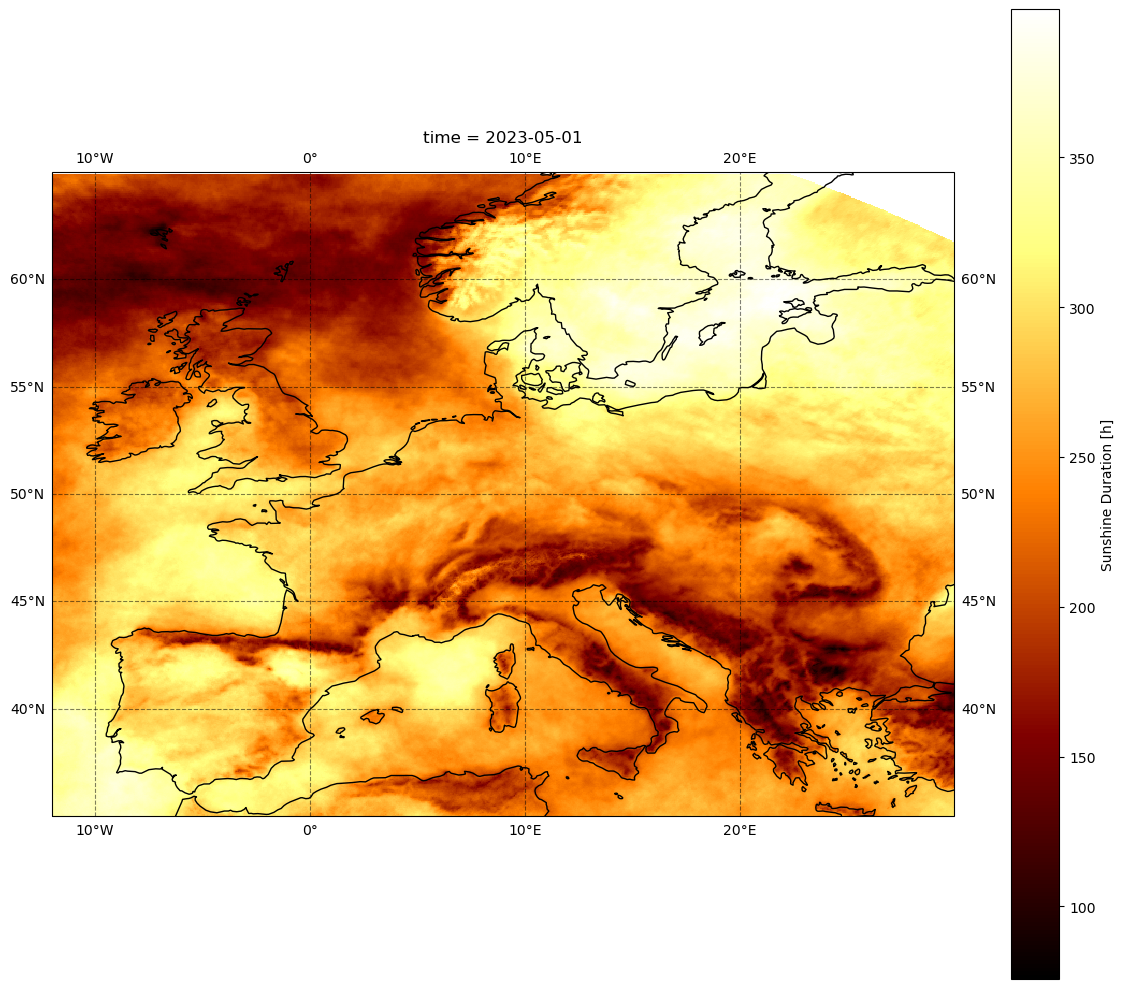

In [17]:
fig = plt.figure(figsize=(12,10))  #figure size
colormap = 'afmhot'                #colormap

#-----Defining the color of nodata pixels------
cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')


#---------------Product visualization--------------------
ax = plt.axes(projection= ccrs.PlateCarree())   #projection 
SDU_data.plot(transform=ccrs.PlateCarree(),cmap=colormap)  #data visualization
ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.5, 
              linestyle='--', 
              draw_labels=True)

cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')
ax.coastlines(color='black')

fig.tight_layout()

plt.savefig('../img/SDU_Europe_Cut.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

The user should have noticed that it is possible to save the resulting map as a png file: that means that each participant of the Jupyter session could produce the various maps described in the notebook and save them, so that they can be downloaded. 

It is worth mentioning that during and after the course the participants could share their maps and plots in the **CM SAF** [**PADLET**](https://padlet.com/CMSAF/the-cm-saf-padlet-azeujpu4vc9cbfcy) where results can be commented by CM SAF experts and the other users.

#### 2.2 'Multiple products' case 

Besides accessing and visualizing a single product, dealing with SARAH-3 products mainly means to manipulate a data record that can cover 40 years of data. For this course some pre-modified NetCDF files have been prepared for both SIS and SDU products, providing data only for a spatial subset of the SEVIRI full disk. This allows to skip the whole process that starts by downloading the original products. As an example, for this course the SIS full data record has been stored in the NetCDF file:

`SIS_1983-01-01-2022-12-01.nc`

which can be opened from the remote server:

In [18]:
SIS_month_rec = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/SARAH_SC/SIS_1983-01-01-2022-12-01.nc'+'#mode=bytes')
SIS_month_rec

<xarray.Dataset>
Dimensions:    (lon: 838, lat: 599, time: 480, nb2: 2)
Coordinates:
  * lon        (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat        (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
  * time       (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2022-12-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    SIS        (time, lat, lon) float32 ...
    time_bnds  (time, nb2) float64 ...
Attributes: (12/28)
    Info:                       Created with the CM SAF R Toolbox.
    institution:                EUMETSAT/CMSAF
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    product_version:            3.0
    creator_name:               DE/DWD
    creator_email:              contact.cmsaf@dwd.de
    ...                         ...
    platform:                   Earth Observation Satellites > METEOSAT
    instrument_vocabulary:      GCMD Instruments, Version 8.6
    instrument:                 MVIRI > Meteosat Visible Infra-Red Imager
    date_created:               2021-11-23T10:31:16Z
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...

If compared with the structure of a single product, the relevant difference is given by the **time** coordinate that is now equal to 480, so the dataset is made of 480 stacked monthly products, covering from 1983 to 2022. The timestamps of all the products can be visible extracting the **time** coordinate:

In [19]:
SIS_month_rec['time']

# SIS_month_rec['time'].values  to see the whole list

<xarray.DataArray 'time' (time: 480)>
array(['1983-01-01T00:00:00.000000000', '1983-02-01T00:00:00.000000000',
       '1983-03-01T00:00:00.000000000', ..., '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2022-12-01
Attributes:
    long_name:      time
    standard_name:  time
    bounds:         time_bnds

Starting from the overall structure, if the user wanted to extract a single variable, it would be necessary first to select which timestamp to consider.:

In [20]:
SIS_month = SIS_month_rec.sel(time = '2022-12-01')
SIS_month

<xarray.Dataset>
Dimensions:    (lon: 838, lat: 599, nb2: 2)
Coordinates:
  * lon        (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat        (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
    time       datetime64[ns] 2022-12-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    SIS        (lat, lon) float32 ...
    time_bnds  (nb2) float64 3.499e+05 3.506e+05
Attributes: (12/28)
    Info:                       Created with the CM SAF R Toolbox.
    institution:                EUMETSAT/CMSAF
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    product_version:            3.0
    creator_name:               DE/DWD
    creator_email:              contact.cmsaf@dwd.de
    ...                         ...
    platform:                   Earth Observation Satellites > METEOSAT
    instrument_vocabulary:      GCMD Instruments, Version 8.6
    instrument:                 MVIRI > Meteosat Visible Infra-Red Imager
    date_created:               2021-11-23T10:31:16Z
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...

At this point, the SIS variable can be extracted:

In [21]:
SIS_data = SIS_month['SIS']
SIS_data

<xarray.DataArray 'SIS' (lat: 599, lon: 838)>
[501962 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
    time     datetime64[ns] 2022-12-01
Attributes:
    units:          W m-2
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Monthly mean Surface Downwelling Shortwave Radiation
    cmsaf_info:     cmsafops::box_mergetime for variable SIS

The user will recognize a structure that is similar to what has been obtained in the previous sections for the single SDU products, so it is possible to visualize the corresponding map as it has been done for the SDU variable:

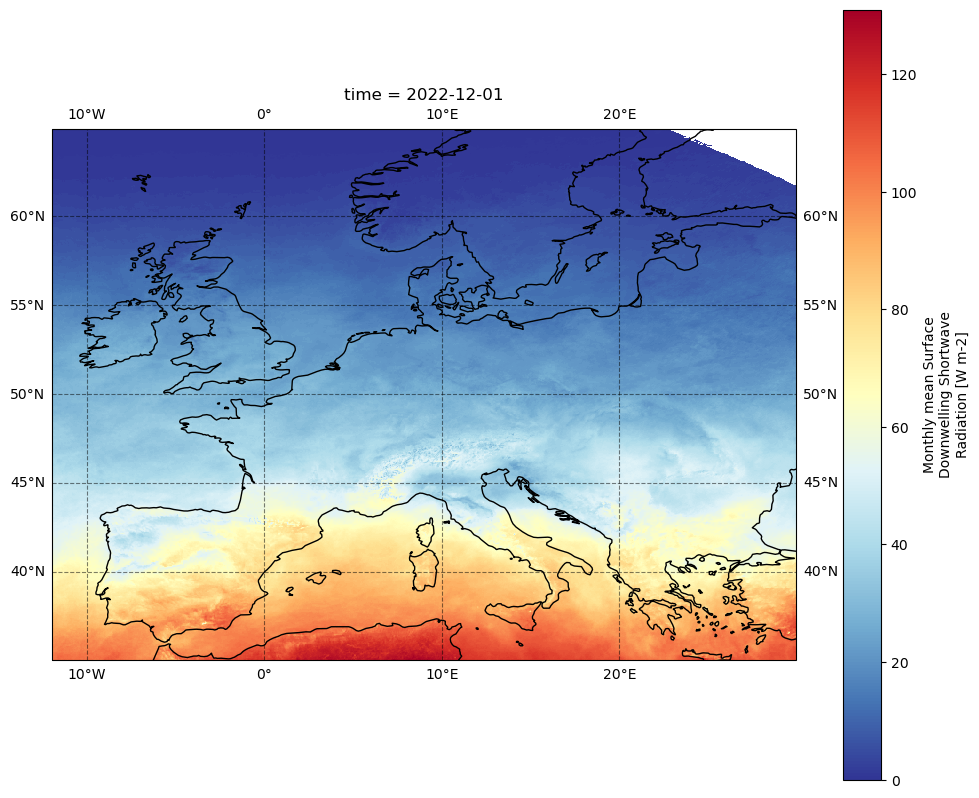

In [22]:
fig = plt.figure(figsize=(12,10))  #figure size
colormap = 'RdYlBu_r'                #colormap warning: the ramp of colors has been inverted 

#-----Defining the color of nodata pixels------
cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')


#---------------Product visualization--------------------
ax = plt.axes(projection= ccrs.PlateCarree())   #projection 
SIS_data.plot(transform=ccrs.PlateCarree(),cmap=colormap)  #data visualization
ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.5, 
              linestyle='--', 
              draw_labels=True)

cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')
ax.coastlines(color='black')

plt.savefig('../img/SIS_cut_2022_12.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

The choice of the colormap aims to distinguish the SDU variable from the SIS one, but in this case the selected colormap has been used after inverting the ramp of colors, in order to keep the map coherent with the values of the variable.
From a visual point of view the size of the colorbar seems to be too large if compared with the map, so the default setting of the colorbar is not the best one for this layout. The user could modify the setting related to the colorbar by adding some instruction in the previous cell of code:

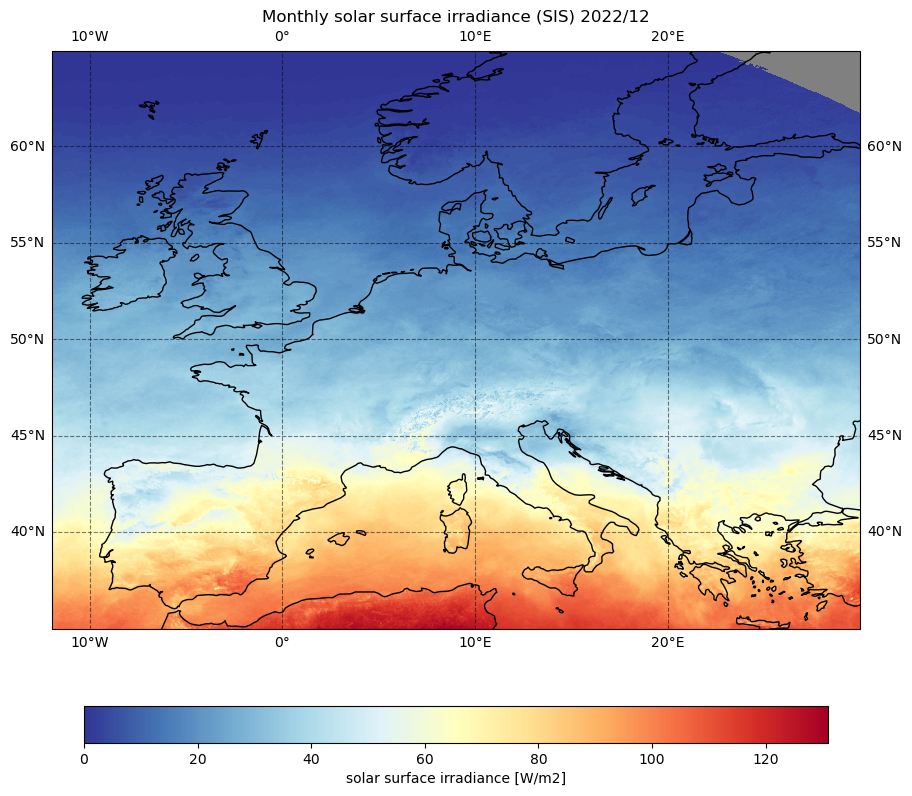

In [23]:
fig = plt.figure(figsize=(12,10))  #figure size
colormap = 'RdYlBu_r'                #colormap warning: the ramp of colors has been inverted 

#-----Defining the color of nodata pixels------
cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')


#---------------Product visualization--------------------
ax = plt.axes(projection= ccrs.PlateCarree())   #projection 


#--------modifying the colorbar settings--------------------
map_eur = SIS_data.plot(ax = ax, add_colorbar=False,cmap = cmap) #data visualization
cbar = plt.colorbar(map_eur, shrink = 0.8, pad = 0.1, orientation='horizontal',label='solar surface irradiance [W/m2]')



ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.5, 
              linestyle='--', 
              draw_labels=True)

cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')
ax.coastlines(color='black')
ax.set_title('Monthly solar surface irradiance (SIS) 2022/12')

#fig.tight_layout()

plt.savefig('../img/SIS_cut_2022_12.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

#### 2.3 'Multiple products' case (**OPTIONAL** during the live short course)

When the submitted order returns a .TAR file that contains multiple NetCDF elements, in case of long term analysis that should produce anomaly maps or extract information from a time series, reading product by product is not the proper way to go. 
The **xarray** library of Python provides the **open_mfdataset** function that can read multiple NetCDF files at the same time, if they are all in the same directory. The result is a new **xarray.Dataset** which includes the data from all the files stored in the source directory. 

#### <span style="color:orange">**Loading multple original SARAH-3 products - the CDR and ICDR example** </span>

If the user is working on the online Jupyter platform, inside the **eodata** directory, the path **SARA3.0_WS/SIS** folder contains the subfolders **ORD49903** and **ORD49903_2** providing the CDR and ICDR, respectively, of the **Solar Surface Irradiance** (SIS) product.

It will be possible to read all the files inside the subfolders with the following instruction:

In [16]:
SIS_month_rec = xr.open_mfdataset('./eodata/SARA3.0_WS/SIS/**/*.nc', concat_dim='time', combine='nested')

<xarray.Dataset>
Dimensions:        (time: 480, bnds: 2, lon: 840, lat: 600)
Coordinates:
  * time           (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2022-12-01
  * lon            (lon) float32 -11.98 -11.93 -11.88 ... 29.88 29.92 29.98
  * lat            (lat) float32 35.03 35.08 35.12 35.17 ... 64.88 64.93 64.97
Dimensions without coordinates: bnds
Data variables:
    time_bnds      (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds       (time, lon, bnds) float32 dask.array<chunksize=(1, 840, 2), meta=np.ndarray>
    lat_bnds       (time, lat, bnds) float32 dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    record_status  (time) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    SIS            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 840), meta=np.ndarray>
    SISC           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 840), meta=np.ndarray>
    SIS_dms        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 840), meta=np.ndarray>
Attributes: (12/41)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                EUMETSAT/CMSAF
    Conventions:                CF-1.7,ACDD-1.3
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    product_version:            3.0
    creator_name:               DE/DWD
    ...                         ...
    time_coverage_resolution:   P1M
    time_coverage_start:        1983-01-01T00:00:00
    time_coverage_end:          1983-02-01T00:00:00
    variable_id:                SIS
    history:                    Mon Jun 05 09:02:03 2023: cdo -v -L -f nc4 -z...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

The string `./eodata/SARA3.0_WS/SIS/**/*.nc` includes all the files that are contained in subfolders of the SIS directory and with the NetCDF extension. The contents of the files will be then temporally sorted and with the coordinates properly aligned thanks to the **open_mfdataset**. And the new combined xarray.Dataset is structured as follows:

In [17]:
SIS_month_rec

<xarray.Dataset>
Dimensions:        (time: 480, bnds: 2, lon: 840, lat: 600)
Coordinates:
  * time           (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2022-12-01
  * lon            (lon) float32 -11.98 -11.93 -11.88 ... 29.88 29.92 29.98
  * lat            (lat) float32 35.03 35.08 35.12 35.17 ... 64.88 64.93 64.97
Dimensions without coordinates: bnds
Data variables:
    time_bnds      (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lon_bnds       (time, lon, bnds) float32 dask.array<chunksize=(1, 840, 2), meta=np.ndarray>
    lat_bnds       (time, lat, bnds) float32 dask.array<chunksize=(1, 600, 2), meta=np.ndarray>
    record_status  (time) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    SIS            (time, lat, lon) float32 dask.array<chunksize=(1, 600, 840), meta=np.ndarray>
    SISC           (time, lat, lon) float32 dask.array<chunksize=(1, 600, 840), meta=np.ndarray>
    SIS_dms        (time, lat, lon) float32 dask.array<chunksize=(1, 600, 840), meta=np.ndarray>
Attributes: (12/41)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                EUMETSAT/CMSAF
    Conventions:                CF-1.7,ACDD-1.3
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    product_version:            3.0
    creator_name:               DE/DWD
    ...                         ...
    time_coverage_resolution:   P1M
    time_coverage_start:        1983-01-01T00:00:00
    time_coverage_end:          1983-02-01T00:00:00
    variable_id:                SIS
    history:                    Mon Jun 05 09:02:03 2023: cdo -v -L -f nc4 -z...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

The code to extract a single product and properly visualize it has been described in the previous section, so here it will be merely replicated just to confirm the same map in output:

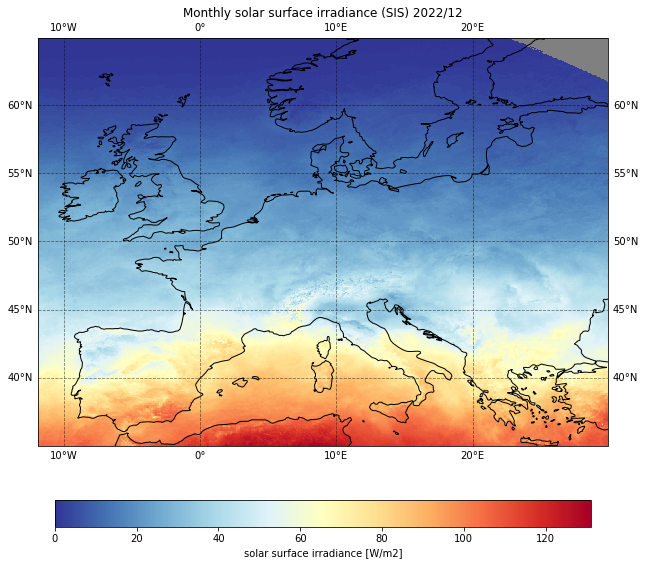

In [40]:
SIS_month = SIS_month_rec.sel(time = '2022-12-01')

SIS_data = SIS_month['SIS']

fig = plt.figure(figsize=(12,10))  #figure size
colormap = 'RdYlBu_r'                #colormap warning: the ramp of colors has been inverted 

#-----Defining the color of nodata pixels------
cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')


#---------------Product visualization--------------------
ax = plt.axes(projection= ccrs.PlateCarree())   #projection 


#--------modifying the colorbar settings--------------------
map_eur = SIS_data.plot(ax = ax, add_colorbar=False,cmap = cmap) #data visualization
cbar = plt.colorbar(map_eur, shrink = 0.8, pad = 0.1, orientation='horizontal',label='solar surface irradiance [W/m2]')



ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.5, 
              linestyle='--', 
              draw_labels=True)

cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')
ax.coastlines(color='black')
ax.set_title('Monthly solar surface irradiance (SIS) 2022/12')

#fig.tight_layout()

#plt.savefig('SIS_cut_2022_12.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

<hr>

### <a id="analysis"></a>**3. Data Extraction and Analysis**

Three different tasks are proposed to the users, to highlight which could be the processings that can be applied to the SARAH-3 products and which results can be obtained.

#### **3.1 - Task 1: map of the long-term monthly mean of SIS for June, with reference period 1983-2020, on Europe cutout**

- extract the variable of interest
- select the time range of interest
- group data by month and compute the long term mean for each month 
- extract the data for the required month
- plot the map for the required month

From the previous sections the whole SIS data record is already available, as an xarray.DataArray object named **SIS_month_rec** :

In [24]:
SIS_month_rec = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/SARAH_SC/SIS_1983-01-01-2022-12-01.nc'+'#mode=bytes')
SIS_month_rec

<xarray.Dataset>
Dimensions:    (lon: 838, lat: 599, time: 480, nb2: 2)
Coordinates:
  * lon        (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat        (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
  * time       (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2022-12-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    SIS        (time, lat, lon) float32 ...
    time_bnds  (time, nb2) float64 ...
Attributes: (12/28)
    Info:                       Created with the CM SAF R Toolbox.
    institution:                EUMETSAT/CMSAF
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    product_version:            3.0
    creator_name:               DE/DWD
    creator_email:              contact.cmsaf@dwd.de
    ...                         ...
    platform:                   Earth Observation Satellites > METEOSAT
    instrument_vocabulary:      GCMD Instruments, Version 8.6
    instrument:                 MVIRI > Meteosat Visible Infra-Red Imager
    date_created:               2021-11-23T10:31:16Z
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...

**Step1**. The temporal coverage spans from 1983 to 2022, so it is necessary to extract the required temporal range **1983-2020**

In [25]:
start_time = '1983-01-01'
end_time = '2020-12-31'

SIS_data = SIS_month_rec['SIS']
SIS_data_subset = SIS_data.sel(time = slice(start_time,end_time))  #extraction of the required temporal range
SIS_data_subset

<xarray.DataArray 'SIS' (time: 456, lat: 599, lon: 838)>
[228894672 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
  * time     (time) datetime64[ns] 1983-01-01 1983-02-01 ... 2020-12-01
Attributes:
    units:          W m-2
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Monthly mean Surface Downwelling Shortwave Radiation
    cmsaf_info:     cmsafops::box_mergetime for variable SIS

The temporal coverage has been set as required, now the long term monthly mean can be computed, in one line , for each of the 12 months.

**Step 2.** Long term monthly mean calculation

In [26]:
SIS_monthly_mean = SIS_data_subset.groupby('time.month').mean(dim='time')
SIS_monthly_mean

<xarray.DataArray 'SIS' (month: 12, lat: 599, lon: 838)>
array([[[1.09027023e+02, 1.09216217e+02, 1.09405403e+02, ...,
         1.12526314e+02, 1.12342102e+02, 1.12078949e+02],
        [1.08837837e+02, 1.08918922e+02, 1.09243240e+02, ...,
         1.12315788e+02, 1.12131577e+02, 1.11973686e+02],
        [1.08702705e+02, 1.08918922e+02, 1.08918922e+02, ...,
         1.12026314e+02, 1.11842102e+02, 1.11973686e+02],
        ...,
        [1.68421054e+00, 1.68421054e+00, 1.65789473e+00, ...,
                    nan,            nan,            nan],
        [1.65789473e+00, 1.65789473e+00, 1.60526311e+00, ...,
                    nan,            nan,            nan],
        [1.65789473e+00, 1.65789473e+00, 1.63157892e+00, ...,
                    nan,            nan,            nan]],

       [[1.43378372e+02, 1.43783783e+02, 1.43756760e+02, ...,
         1.48378372e+02, 1.48405411e+02, 1.48324326e+02],
        [1.43405411e+02, 1.43162155e+02, 1.43405411e+02, ...,
         1.48135132e+02, 1.47702698e+02, 1.47756760e+02],
        [1.42729736e+02, 1.42756760e+02, 1.42783783e+02, ...,
         1.47459457e+02, 1.47297302e+02, 1.47162155e+02],
...
        [4.81578970e+00, 4.76315784e+00, 4.73684216e+00, ...,
                    nan,            nan,            nan],
        [4.71052647e+00, 4.73684216e+00, 4.68421030e+00, ...,
                    nan,            nan,            nan],
        [4.52631569e+00, 4.57894754e+00, 4.65789461e+00, ...,
                    nan,            nan,            nan]],

       [[9.77368393e+01, 9.77105255e+01, 9.80789490e+01, ...,
         1.02500000e+02, 1.02500000e+02, 1.02421051e+02],
        [9.74473648e+01, 9.74210510e+01, 9.75789490e+01, ...,
         1.02263161e+02, 1.02263161e+02, 1.02184212e+02],
        [9.72631607e+01, 9.73684235e+01, 9.74210510e+01, ...,
         1.01815788e+02, 1.02000000e+02, 1.01842102e+02],
        ...,
        [1.31578952e-01, 1.31578952e-01, 1.05263159e-01, ...,
                    nan,            nan,            nan],
        [1.84210524e-01, 2.10526317e-01, 1.84210524e-01, ...,
                    nan,            nan,            nan],
        [2.10526317e-01, 2.10526317e-01, 2.10526317e-01, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          W m-2
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Monthly mean Surface Downwelling Shortwave Radiation
    cmsaf_info:     cmsafops::box_mergetime for variable SIS

Now the SIS data have been grouped by month and then the monthly mean has been calculated for each month across the temporal coverage, so the result provides the mean values for each month on the spatial coverage of the product. It is now required to select the month of June.

**Step 3.** Single month extraction (June)

In [27]:
SIS_mean_June = SIS_monthly_mean.sel(month = 6)
SIS_mean_June

<xarray.DataArray 'SIS' (lat: 599, lon: 838)>
array([[281.1842 , 281.5263 , 282.     , ..., 341.0263 , 341.0263 ,
        340.94736],
       [280.73685, 281.07895, 281.57895, ..., 341.10526, 340.92105,
        340.89474],
       [280.6842 , 281.0263 , 281.21054, ..., 341.     , 340.9737 ,
        340.89474],
       ...,
       [184.26315, 183.97368, 183.8421 , ...,       nan,       nan,
              nan],
       [184.3421 , 184.     , 183.57895, ...,       nan,       nan,
              nan],
       [184.6842 , 184.13158, 183.8421 , ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
    month    int64 6
Attributes:
    units:          W m-2
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Monthly mean Surface Downwelling Shortwave Radiation
    cmsaf_info:     cmsafops::box_mergetime for variable SIS

A single month has been extracted and now the corresponding map can be visualized.

**Step 4.** Data visualization

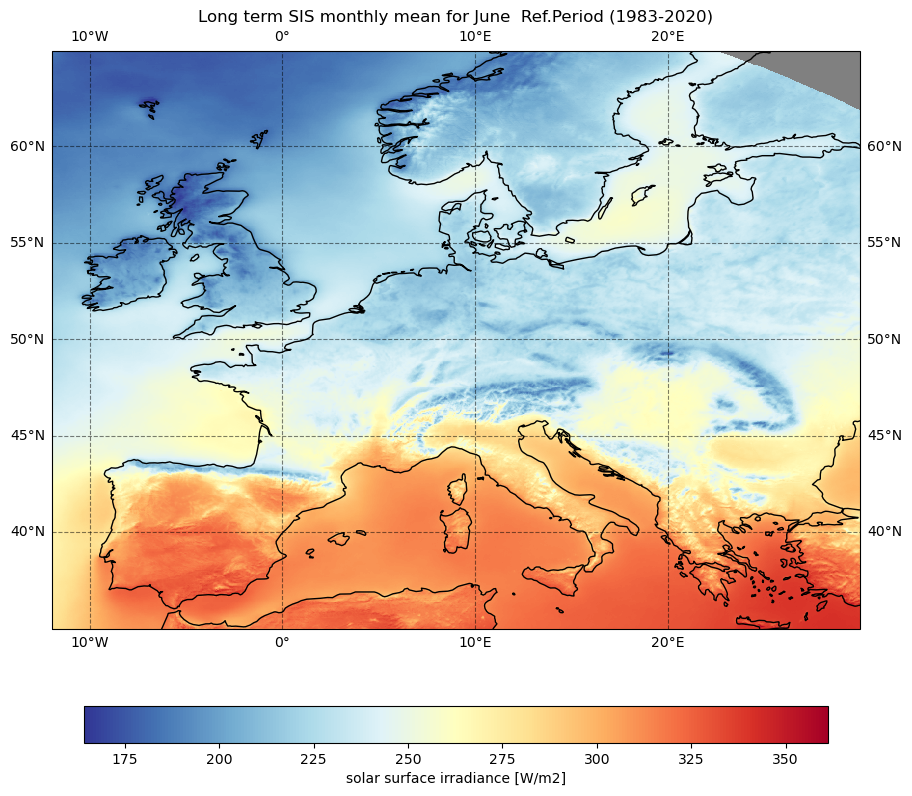

In [28]:
fig = plt.figure(figsize=(12,10))  #figure size
colormap = 'RdYlBu_r'                #colormap warning: the ramp of colors has been inverted 

#-----Defining the color of nodata pixels------
cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')


#---------------Product visualization--------------------
ax = plt.axes(projection= ccrs.PlateCarree())   #projection 


#--------modifying the colorbar settings--------------------
map_eur = SIS_mean_June.plot(ax = ax, add_colorbar=False,cmap = cmap) #data visualization
cbar = plt.colorbar(map_eur, shrink = 0.8, pad = 0.1, orientation='horizontal',label='solar surface irradiance [W/m2]')



ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.5, 
              linestyle='--', 
              draw_labels=True)

cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')
ax.coastlines(color='black')
ax.set_title('Long term SIS monthly mean for June  Ref.Period (1983-2020)' )

plt.savefig('../img/SIS_June_mean.png', dpi = 100, bbox_inches='tight') #saving the map as a .png file

plt.show()

#### **3.2 - Task 2: Plot time series of monthly SIS for a selected location in the period 1983-2020**

- define geografical coordinates of the selected point
- find a SARAH-3 grid box with defined coordinates 
- plot time series of monthly SIS over the requested period

**Step 1.** Define the geographical coordinates of the selected point

In [29]:
Location = 'Offenbach'
Latitude = 50.1
Longitude = 8.75 

**Step 2.** Extract the time series for the point location using a SARAH-3 grid box

It is possible to use directly the SIS data record that has been already extracted for 1983-2020 in the previous task

In [ ]:
SIS_Offenbach = SIS_data_subset.sel(lat = Latitude, lon = Longitude, method = 'nearest')
SIS_Offenbach

As the time series is referred to a single point, now the only coordinate that defines the variabilty of the parameter is the time.

**Step 3.** Plot the time series for the requested period.

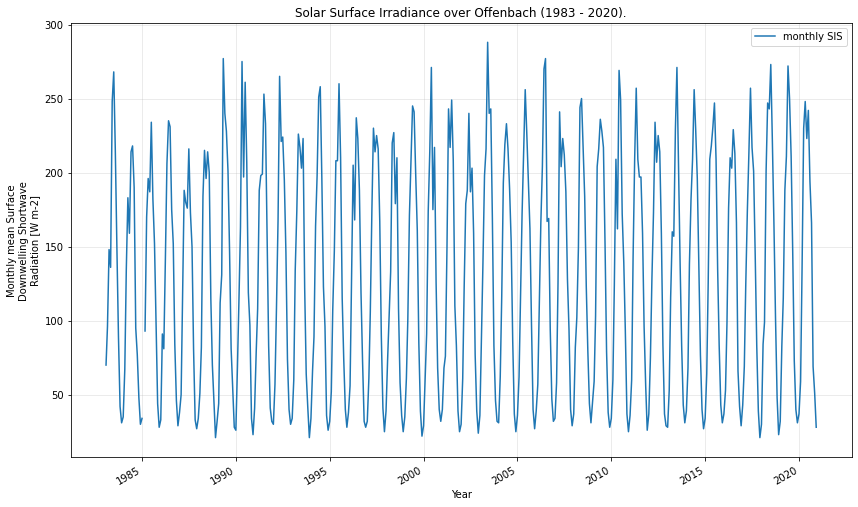

In [29]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes()
SIS_Offenbach.plot(ax=ax, label='monthly SIS')
ax.set_xlabel('Year')
ax.grid(alpha = 0.3)
ax.legend()
ax.set_title('Solar Surface Irradiance over '+Location+' (1983 - 2020).')
plt.savefig('SIS_Offenbach_TS.png', dpi = 100, bbox_inches='tight')
plt.show()

#### **3.3 - Task 3: Monthly anomaly of SDU for May 2023 Ref.Period (1991-2020)**

- Load and open the SDU data record
- Extract the SDU data for the required reference period
- Calculate the monthly long term mean for May
- Extract the SDU data for May 2023
- Calculate the monthly anomaly for May as **data of May 2023** - **May long term monthly mean**
- Visualize the May monthly anomaly map of SDU

**Step 1.** The SDU data are contained  in the predefined NetCDF file `SDU_1991-01-01-2020-12-01.nc` that can be directly loaded from the remote repository provided by CM SAF

In [2]:
SDU_month_rec = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/SARAH_SC/SDU_1991-01-01-2020-12-01.nc'+'#mode=bytes')
SDU_month_rec

<xarray.Dataset>
Dimensions:    (lon: 838, lat: 599, time: 361, nb2: 2)
Coordinates:
  * lon        (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat        (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
  * nb2        (nb2) float64 0.0 1.0
Data variables:
    SDU        (time, lat, lon) float32 ...
    time_bnds  (time, nb2) float64 ...
Attributes: (12/28)
    Info:                       Created with the CM SAF R Toolbox.
    institution:                EUMETSAT/CMSAF
    id:                         DOI:10.5676/EUM_SAF_CM/SARAH/V003
    product_version:            3.0
    creator_name:               DE/DWD
    creator_email:              contact.cmsaf@dwd.de
    ...                         ...
    platform:                   Earth Observation Satellites > METEOSAT
    instrument_vocabulary:      GCMD Instruments, Version 8.6
    instrument:                 MVIRI > Meteosat Visible Infra-Red Imager
    date_created:               2021-11-23T11:08:30Z
    title:                      CM SAF Surface Solar Radiation Climate Data R...
    summary:                    This file contains data from the CM SAF Surfa...

**Step 2.** Extract the data for the reference period of interest (1991-2020)

In [4]:
start_date = '1991-01-01'
end_date = '2020-12-31'

SDU_data = SDU_month_rec['SDU']   #variable extraction
SDU_data_subset = SDU_data.sel(time = slice(start_date,end_date))  #extraction of the required temporal range
SDU_data_subset

<xarray.DataArray 'SDU' (time: 360, lat: 599, lon: 838)>
[180706320 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
  * time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
Attributes:
    units:          h
    standard_name:  duration_of_sunshine
    long_name:      Sunshine Duration
    cmsaf_info:     cmsafops::box_mergetime for variable SDU

**Step 3.** Calculate the long term monthly mean for May. It is the same operation already implemented for the SIS data in Task-1(longer time required)

In [5]:
SDU_monthly_mean = SDU_data_subset.groupby('time.month').mean(skipna = False)
SDU_monthly_mean

<xarray.DataArray 'SDU' (month: 12, lat: 599, lon: 838)>
array([[[178.32335 , 179.63664 , 180.07335 , ..., 185.82668 ,
         185.57668 , 185.05667 ],
        [178.19    , 178.96666 , 179.84334 , ..., 186.19    ,
         185.70334 , 185.54002 ],
        [177.37997 , 178.29666 , 178.48666 , ..., 185.7733  ,
         185.40001 , 184.73666 ],
        ...,
        [  0.      ,   0.      ,   0.      , ...,        nan,
                nan,        nan],
        [  0.      ,   0.      ,   0.      , ...,        nan,
                nan,        nan],
        [  0.      ,   0.      ,   0.      , ...,        nan,
                nan,        nan]],

       [[177.57666 , 178.60667 , 178.91669 , ..., 191.16667 ,
         191.10997 , 190.61665 ],
        [178.09334 , 177.89    , 178.51334 , ..., 190.22665 ,
         189.99333 , 189.72998 ],
        [177.55667 , 177.56664 , 177.42668 , ..., 189.42667 ,
         189.24667 , 188.9067  ],
...
        [ 13.043334,  13.046666,  13.386667, ...,        nan,
                nan,        nan],
        [ 13.103332,  13.326666,  13.223332, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[170.56999 , 171.53668 , 172.17668 , ..., 182.43666 ,
         182.15334 , 181.64333 ],
        [169.65332 , 169.95665 , 170.37332 , ..., 181.65335 ,
         181.93    , 182.12003 ],
        [170.22334 , 170.07333 , 170.26666 , ..., 181.24335 ,
         181.57668 , 182.01666 ],
        ...,
        [  0.      ,   0.      ,   0.      , ...,        nan,
                nan,        nan],
        [  0.      ,   0.      ,   0.      , ...,        nan,
                nan,        nan],
        [  0.      ,   0.      ,   0.      , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          h
    standard_name:  duration_of_sunshine
    long_name:      Sunshine Duration
    cmsaf_info:     cmsafops::box_mergetime for variable SDU

From the stack of the twelve monthly means, it is possible to extract May:

In [6]:
SDU_mean_May = SDU_monthly_mean.sel(month = 5)
SDU_mean_May

<xarray.DataArray 'SDU' (lat: 599, lon: 838)>
array([[286.53668, 287.94   , 288.15997, ..., 338.70004, 338.36334,
        338.16   ],
       [286.3633 , 287.16666, 287.9533 , ..., 338.47003, 338.57333,
        338.74005],
       [286.08334, 287.20667, 287.62665, ..., 338.69672, 338.35336,
        338.33664],
       ...,
       [161.8333 , 161.47   , 160.36002, ...,       nan,       nan,
              nan],
       [162.02666, 161.01   , 160.13998, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
    month    int64 5
Attributes:
    units:          h
    standard_name:  duration_of_sunshine
    long_name:      Sunshine Duration
    cmsaf_info:     cmsafops::box_mergetime for variable SDU

**Step 4.** Extract the SDU data for May 2023.

It is necessary to read the data directly from the remote repository.

In [7]:
SDU_May_2023 = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/SARAH_SC/SDUms202305010000004UD10001I1UD.nc'+'#mode=bytes')
SDU_May_2023
SDU_May_2023_data = SDU_May_2023['SDU']

**Step 5.** Calculate the monthly anomaly 

In [8]:
SDU_May23_anomaly = SDU_May_2023_data - SDU_mean_May
SDU_May23_anomaly

<xarray.DataArray 'SDU' (time: 1, lat: 599, lon: 838)>
array([[[ 53.36331 ,  56.160004,  54.74002 , ..., -33.200043,
         -31.563324, -32.95999 ],
        [ 54.936707,  58.43335 ,  57.246704, ..., -31.870026,
         -31.973328, -33.24005 ],
        [ 57.61667 ,  58.293335,  57.773346, ..., -33.196716,
         -33.553345, -34.33664 ],
        ...,
        [ 59.3667  ,  56.03    ,  56.83998 , ...,        nan,
                nan,        nan],
        [ 55.373352,  56.59001 ,  57.860016, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2023-05-01
  * lon      (lon) float64 -11.93 -11.88 -11.82 -11.77 ... 29.83 29.88 29.92
  * lat      (lat) float64 35.03 35.08 35.12 35.17 ... 64.78 64.82 64.88 64.93
    month    int64 5

**Step 6.** Visualize the monthly anomaly map

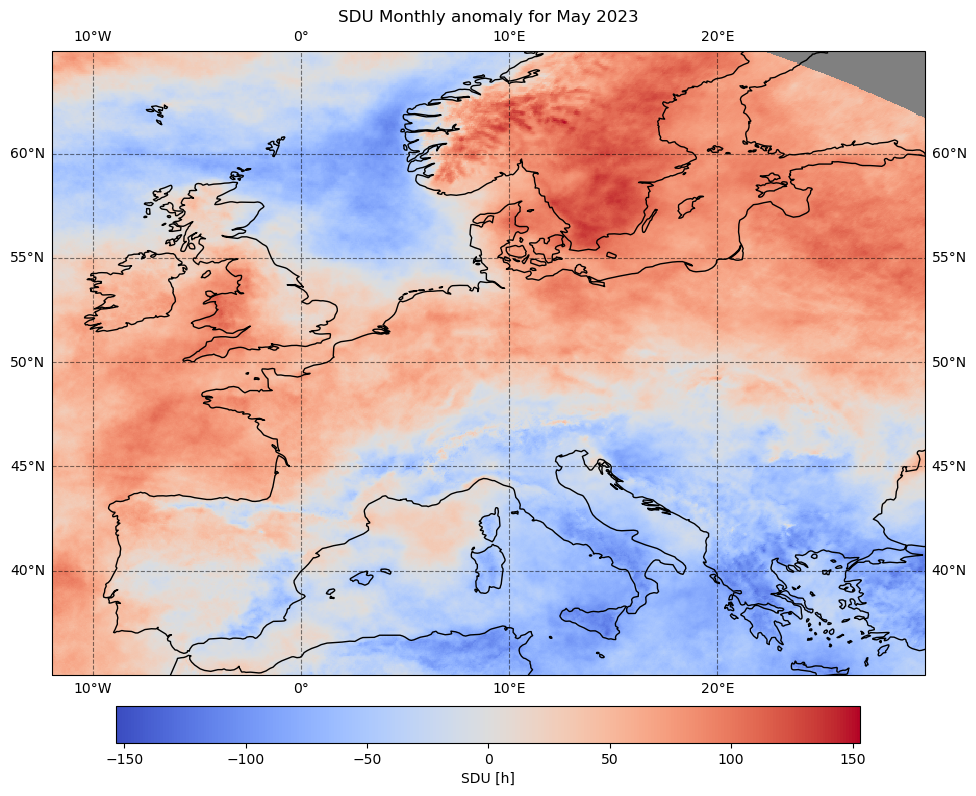

In [14]:
fig = plt.figure(figsize=(12,10))  #figure size
colormap = 'coolwarm'                #colormap warning: the ramp of colors has been inverted 

#-----Defining the color of nodata pixels------
cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')


#---------------Product visualization--------------------
ax = plt.axes(projection= ccrs.PlateCarree())   #projection 


#--------modifying the colorbar settings--------------------
map_eur = SDU_May23_anomaly.plot(ax = ax, add_colorbar=False,cmap = cmap) #data visualization
cbar = plt.colorbar(map_eur, shrink = 0.8, pad = 0.04, orientation='horizontal',label='SDU [h]')



ax.gridlines( crs=ccrs.PlateCarree(),   #gridlines options
              linewidth=0.8,
              color='black', 
              alpha=0.5, 
              linestyle='--', 
              draw_labels=True)

cmap = plt.get_cmap(colormap)
cmap.set_bad('grey')
ax.coastlines(color='black')
ax.set_title('SDU Monthly anomaly for May 2023' )

plt.savefig('../img/SDU_May_anom.png', dpi = 300, bbox_inches='tight') #saving the map as a .png file

plt.show()

<hr>

<img src='https://git.services.meeo.it/ltpy/climate/-/raw/main/SMA2024_CM_SAF/img/CM_SAF_banner.png' align='center' width='100%'>